# Veri Bilimi için İstatistik

## 1. Örneklem alma

In [1]:
import numpy as np
populasyon = np.random.randint(0, 80, 10000)
populasyon[0:10]

array([47, 46, 62, 77, 49, 35, 60, 61, 14, 17])

In [4]:
#orneklem cekimi
np.random.seed(150) #rastgelelilik islimini her yeniden cagirildiginda ayni sayilari uretmesi icin şartlar
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([ 7, 74, 65, 78, 50,  8, 41,  8, 23,  7])

In [5]:
orneklem.mean()

42.84

In [6]:
populasyon.mean()

39.3286

In [16]:
np.random.seed(10)
orneklemList=[]
for i in range(10):
    orneklemList.append(np.random.choice(a = populasyon, size = 100))

In [19]:
orneklemList=np.array(orneklemList)
orneklemList.mean()

39.148

In [21]:
orneklemList[1].mean()

38.26

## 2. Betimsel İstatistik

varyans, ortalama etrafındaki dağılımın ölçüsü

kovaryans, iki değişken arasındaki değişkenlik ölçüsü

korelasyon, iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkenin şiddetini ve yönünü ifade eden istatistiksel bir tekniktir.

In [22]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [24]:
!pip install researchpy
import researchpy as rp

In [29]:
#surekli (sayısal) değişkenler için kullanılır.
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


**Not:** 

    N: eleman sayısı
    Mean: ortalama
    SD: Standart Deviation (Standart sapma)
    SE: Standart Error (Standart Hata)
    95% Conf. interval :(default değeri 95%) %95 güven aralığı, popülasyonun gerçek ortalamasını içerdiğinden %95 emin olabileceğiniz bir değerler aralığıdır. Doğal örnekleme değişkenliği nedeniyle, örnek ortalaması (CI'nin merkezi) örnekten örneğe değişecektir.
    
    Güven Aralığı: Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.
    
yukarıdaki örnek için; total_bill
    
    n=244
    mean=19.7859	
    sd=8.9024	
    
    güven aralığın ne olacak? (bizim ornegimiz icin 95%)
    Z Tablo değeri 95% için 1,96
    
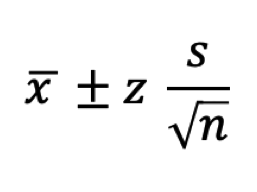

19.7859 +- (1.96*(8.9024/pow(244,1/2)))


In [47]:
a=(1.96*(8.9024/pow(244,1/2)))
a
b=19.7859-a
c=19.7859+a
print(b)
print(c)

18.668861190483682
20.90293880951632


In [37]:
#kategorik değişkenler için kullanılır.
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [38]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [39]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## 3. Uygulama: Fiyat Stratejisi Karar Destek
Elimizdeki ürünün satış fiyatını belirlemeye çalışacağız. Ancak fiyat belirleme işinde bilimsel bir dayanak ve farklı senaryolara göre de esneklik beklentimiz var.

bir anket çalışmasıyla potansiyel alıcılara "bu ürüne kadar öderdiniz" sorusu yöneltiliyor.

In [51]:
import numpy as np
fiyatlar = np.random.randint(10,100, 1000)
fiyatlar.mean() #en basit yöntemle ortalama alabiliriz.

54.491

In [52]:
import statsmodels.stats.api as sms
sms.DescrStatsW(fiyatlar).tconfint_mean() #yapılan araştırmada her yüz kişiden 95'i bu aralıkta fiyat ödemeyi makul buluyor

(52.871442761407614, 56.110557238592385)

## 4. Olasılık Dağılımları
Rassal değişkenlerin alabilecekleri değerlere ve bu değerlere ilişkin olasılıklara bu değişkenin olasılık dağılımı denir.

    Kesikli olasılık dağılımları 
         ** Bernoulli
         ** Binom
         ** Poisson
         ** ...
         
    Sürekli Olasılık Dağılımları
        ** Normal Dağılım
        ** Uniform Dağılım
        ** Üstel Dağılım
        ** ...

### 4.1. Bernoulli Dağılımı
Sonucun sadece iki farklı değerden birisi olduğu rassal değişkenleri ifade eder. (Yazı - Tura örneği)

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$

    p: olasılık
    k: deney sonucunda kesikli değişkenin alacağı değer

${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [54]:
from scipy.stats import bernoulli
p = 0.6
rv = bernoulli(p)
rv.pmf(k = 0)

0.4

**Not:** **Büyük Sayılar yasası** Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremi

In [56]:
import numpy as np
rng = np.random.RandomState(123)
rng.randint(0, 2, size = 5)

array([0, 1, 0, 0, 0])

In [58]:
import numpy as np
rng = np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:",deney_sayisi,"---",'Yazı Olasılığı: %.2f' % (yazi_olasiliklari * 100))

Atış Sayısı: 2 --- Yazı Olasılığı: 50.00
Atış Sayısı: 4 --- Yazı Olasılığı: 0.00
Atış Sayısı: 8 --- Yazı Olasılığı: 62.50
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.20
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.00
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09


### 4.2. Binom Dağılımı

Binom dağılımı çok sayıda gerçekleştirilen Bernoulli dağılımı olarak değerlendirilebilir.
Binom dağılımında sonuç,gerçekleştirilen çok sayıdaki Bernoulli denemesinde elde edilen başarıların toplamıdır.

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n

    k=1
    n=100
    p=0.01
${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

In [70]:
from scipy.stats import binom
p = 0.01 # reklama tıklanma olasılığı
n = 100 # reklamı gören kişi sayısı
rv = binom(n, p)
print(rv.pmf(1)) # 1 kişinin reklama tıklaması
print(rv.pmf(5)) # 5 kişinin reklama tıklaması
print(rv.pmf(10)) # 10 kişinin reklama tıklaması

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


### 4.3. Geometrik Dağılımı
N adet Bernoulli denemesinde ilk başarıyı elde edene kadar geçecek başarısız deneme sayısını belirler.

${\displaystyle p(X=k)=(1-p)^{k-1}}.p$

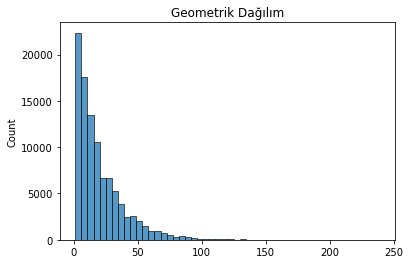

In [67]:
import numpy as np
import seaborn as sns
geom=np.random.geometric(p=0.05,size=100000)
sns.histplot(geom,bins=50).set(title='Geometrik Dağılım');

### 4.4. Poisson Dağılımı
Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

In [73]:
from scipy.stats import poisson
lambda_ = 0.1 #ortalama hata sayısı
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0)) # hiç hata olmama olasılığı
print(rv.pmf(k = 3)) # 3 hata olma olasılığı
print(rv.pmf(k = 5)) # 5 hata olma olasılığı

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


### 4.5. Normal Dağılımı
Gauss dağılımı olarak da isimlendirilir. Bir ortalama etrafında simetrik olarak yayılan bir dağılım türü olarak düşünebiliriz.
Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması için kullanılır.

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

In [79]:
from scipy.stats import norm
#90'dan fazla olması 
1-norm.cdf(90, 80, 5) #cumulative density function: ortalama:80, standart sapma:5, 90'dan fazla olma olasılığı

0.02275013194817921

In [75]:
#70'den fazla olması
1-norm.cdf(70, 80, 5)

0.9772498680518208

In [80]:
#70'den az olması
norm.cdf(70, 80, 5)

0.022750131948179195

In [77]:
#85 ile 90 arasında olması
norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

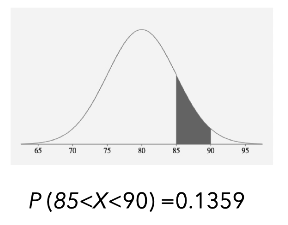

### 4.6. Üssel Dağılım
Geometrik dağılımın  sürekli versiyonudur.

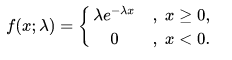

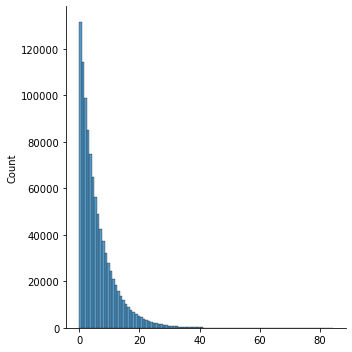

In [83]:
import numpy as np
import seaborn as sns
exp1=np.random.exponential(6,1000000)
sns.displot(exp1,bins=100);


## 5. Hipotez Testi
Bir inanışı test etmek için kullanılan istatistiksel tekniklerdir.


**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d>  (Alternatif hipotez)<br><br> 

Yönlü Hiptez

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>


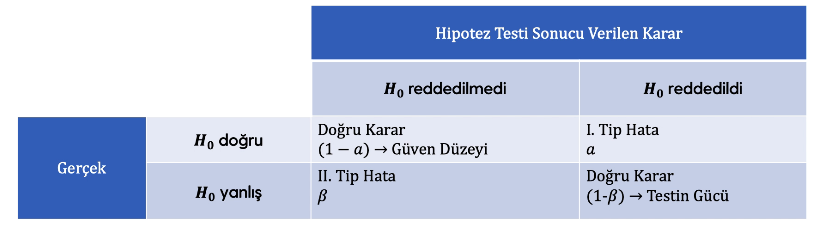








**p-value değeri**

P değeri bir karşılaştırmada “istatistiksel anlamlı fark vardır” kararı vereceğimiz zaman yapacağımız olası hata miktarını gösterir. Ünlü bir istatistikçi olan Fisher tarafından bu hatanın maksimum kabul edilebilir düzeyi **0,05** olarak önerilmiş ve kabul görmüştür. Bir test sonucunda bulunan P değeri 0,05'in altında bir değer ise karşılaştırma sonucunda anlamlı farklılık bulunduğu anlamına gelir.

Her durum için bu değere bakarak karar vermek doğru olmayabilir. (Dağılım testlerinde H0'ı reddetmek istenilmez. Çünkü H0 "örnek dağılım ile teorik dağılım arasında fark yoktur" der)

**Hipotez Testi Adımları**

    1. Hipotezlerin kurulması ve yönlerinin belirlenmesi
    2. Anlamlılık düzeyi ve tablo değerinin belirlenmesi (alpha)
    3. Test istatistiğinin belirlenmesi ve hesaplanması
    4. Hesaplanan test istatistiği ile alfa'ya karşılık gelen tablo değerinin karşılaştırılması
    5. Yorum


**Tek Örneklem T Testi**

Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir farlılık olup olmadığını test etmek için kullanılan parametrik bir testtir.

    Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
    Anakütle standart sapması bilinmiyorsa ve n>30 ise z istatistiği kullanılır.
    Anakütle standart sapması bilinmiyorsa ve n<30 ise t istatistiği kullanılır.
    
**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

${\displaystyle z={\frac {{\bar {x}}-\mu _{0}}{\frac {\sigma}{\sqrt {n}}}}}$

### 5.1. **Örnek Uygulama**

Bir web sitemiz var ve bu web sitesinde geçirilen ortalama zamanın 170 saniye olduğu düşünülüyor. Bu durumu istatistiksel olarak kanotlamak istiyoruz.

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>170</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>170</i></d>  <br><br> 

In [3]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [4]:
import scipy.stats as stats
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

Burada;

    nobs: gözlem sayısı =50
    minmax: min=17, max=251
    mean: ortalama=154.38
    variance: varyans=2578.0363265306123
    skewness: çarpıklık=-0.32398897278694483
    kurtosis: basıklık=-0.05849823498415985
    
Burada görüldüğü gibi ortalama değeri 154 olarak belirlenmiştir ve 170 değildir. Ancak bu durum aldığımız 50 örneklem için geçerli olabilir, alacağımız diğer örneklemlerde sonuç bu şekilde çıkmayabilir.

**Varsayımlar**

**Normallik varsayımı**

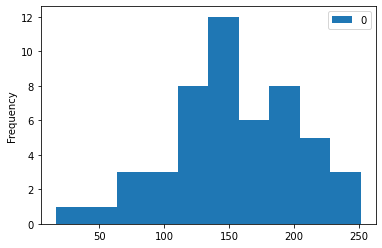

In [7]:
import pandas as pd
#histogram
pd.DataFrame(olcumler).plot.hist();
#dağılım normal gibi görünmekte

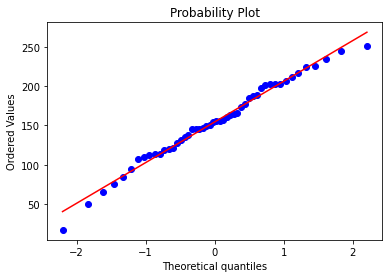

In [8]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

**Not:** üstteki grafik incelendiğinde de normal dağılım varsayımının sağlandığı gözlemlenmektedir.
sol kısım örnek dağılımını (elimizdeki ölçümler), alt kısım teorik dağılımı (şu an ilgilendiğimiz normal dağılım) ifade eder.

elimizdeki noktalar kırmızı çizgi etrafında yoğunlaşmışsa dağılımın normal olduğunu söyleyebiliriz.


**Shapiro-Wilks Testi**

H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark yoktur

H1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır

In [9]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [10]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


Burada p-value değeri 0.05'den küçük çıksaydı H0 hipotezini reddedebilirdik. ancak örneğimizde büyük çıktığı için H0 hipotezini reddedemiyoruz.

varsayımımız sağlandığına göre hipotez testini uygulayabiliriz...

**Hipotez Testinin uygulanması**



In [12]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

p-value değeri 0.05'den küçük olduğu için H0 hipotezini reddedebiliriz.

H0: Web sitemizde geçirilen ortalama süre 170'tir
H1: .. değildir.

**Not:** Yukarıdaki örnekte Shapiro-Wilks Testi negatif çıksaydı, H1 doğru olsaydı, tek örneklem T testini kullanamayacaktık.
bu durumda ise **Nonparametrik Tek Örneklem Testi**ni uygulayabilirdik.

In [13]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

### 5.2. Bağımsız İki Örneklem T Testi (AB Testi)
Bağımsız iki grup ortalaması arasında karşılaştırma yapılmak istendiğinde kullanılır.

#### 5.2.1. **Örnek Uygulama** 
geliştirilen bir makine öğrenmesi modeli canlı sisteme entegre edilmiş ve bu makine öğrenmesi modelinin başarısı test edilmek isteniyor. 
Senaryo: bir web sitesinde kullanılan kanvansiyonel ürün öneri sistemi yerine kullanılmak üzere belirli bir yatırımla makine öğrenmesi modeli geliştiriliyor. yeni model konvansiyonel modele kıyasla satişlarimizda artışa neden olmuş mu? verileri toplamak için A grubuna eski sistemle ürün önermesi yapılırken B grubuna makine öğrenmesi modeli ile ürün önermesi yapılıyor.

    A: Eski sistem
    B: makine öğrenmesi modeli (yeni sistem)

H0: M1 = M2 (A sisteminin gelirler ortalaması ile B sisteminin gelirler ortalaması birbirine eşittir)

H1: M1 != M2 (... degildir.)

In [14]:
#veriler bu haliyle duzenlenmeden alınırsa anlamli bir tablo oluşmayacaktır.
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [17]:
#veriseti üzerinde düzenleme yaparak tabloyu kullanılabilir hale getiriyoruz
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [18]:
AB.tail()

,gelir,GRUP
25,33,B
26,26,B
27,32,B
28,33,B
29,29,B


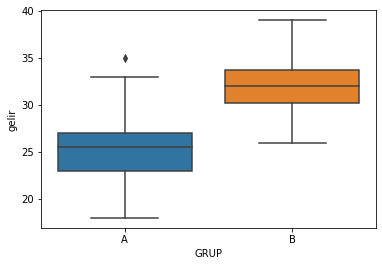

In [19]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

**Not:** yukarıda görünen grafiğe göre B grubunun daha iyi sonuç verdiğini gözlemledik ancak bu veri şans eseri mi oluştu, istatistiki olarak anlamlı bir fark mı? 

**Varsayım kontrolü**

In [20]:
#normallik varsayımı
from scipy.stats import shapiro
#shapiro fonksiyonu değer olarak değişkenin kendisini bekler o da ilk oluşturduğumuz dataframede A_B.A olarak belirlenmişti

In [21]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [22]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

p-value değerine bakarak:
    
    H0: örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur hipotezini reddedemiyoruz.

In [23]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

ikinci grup için de p-value değerine bakarak:
    
    H0: örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur hipotezini reddedemiyoruz.

**Varyans homojenliği varsayımı**

    H0: Varyanslar Homojendir
    H1: Varyanslar Homojen Değildir

In [24]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

p-value değerine bakarak:
    
    H0: varyanslar homojendir hipotezini reddedemiyoruz. dolayısıyla varsayım sağlanmaktadır.
    
**Hipotezin test edilmesi**

In [26]:
 #ind==independent equal_var==varyans homojenligi varsayiminin saglanip saglanmadigi (yukarıda test ettik)
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

p-value degerine bakarak (<0.05):

     H0: (A sisteminin gelirler ortalaması ile B sisteminin gelirler ortalaması birbirine eşittir) hipotezini reddediyoruz. dolayısıyla varsayım sağlanmamaktadır.

In [27]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


**Not:** varsayalım ki yukarıda gerçekleştirdiğimiz iki testin (normallik varsayımı ve varyans homojenlik varsayımı) sonuçları sağlanmasın. bu durumda nonparametrik test uygulamamiz gerekir.

In [28]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [29]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


### 5.3. Bağımlı İki Örneklem T Testi
Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istendiğinde kullanılır.

#### 5.3.1. **Örnek Uygulama** 
şirket içi eğitimin performans etkisi ölçümü. çalışanların eğitim öncesi performans ölçümleri kaydediliyor. aynı çalışanlara eğitim verildikten sonra tekrar performans ölçümleri alınıyor.



H0: Mö = Ms (Eğitim öncesi ve sonrası performans ortalaması birbirine eşittir)

H1: M1 != M2 (... degildir.)


In [30]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [31]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [32]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [33]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



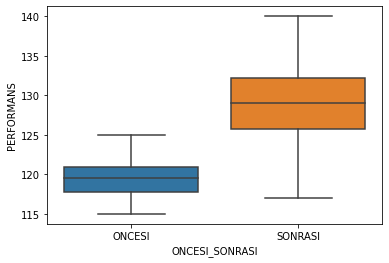

In [34]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

**Not:** yukarıda görünen grafiğe göre eğitimin performans artışına neden olduğunu gözlemledik ancak bu veri şans eseri mi oluştu, istatistiki olarak anlamlı bir fark mı? 

**Varsayım kontrolü**

In [35]:
from scipy.stats import shapiro
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

p-value değerine bakarak:
    
    H0: örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur hipotezini reddedemiyoruz.

In [36]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

p-value değerine bakarak:
    
    H0: örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur hipotezini reddedemiyoruz.
    
**Varyans homojenliği varsayımı**

    H0: Varyanslar Homojendir
    H1: Varyanslar Homojen Değildir

In [38]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

p-value değerine bakarak (<0.05):
    
    H0: varyanslar homojendir hipotezini reddediyoruz. dolayısıyla varsayım sağlanmamaktadır. Yani varyanslar homojen değildir.
    
bu durumda veriseti üzerinde aykırı durumlar incelenerek gerekli duzenlemeler yapilabilir ya da bu durum göz ardı edilebilir.
    
**Hipotezin test edilmesi**

In [39]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

p-value degerine bakarak (<0.05):

     H0: (eğitim öncesi ve sonrası çalışan performansında bir değişim yoktur) hipotezini reddediyoruz. dolayısıyla varsayım sağlanmamaktadır.

In [40]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


**Not:** varsayalım ki yukarıda gerçekleştirdiğimiz iki testin (normallik varsayımı ve varyans homojenlik varsayımı) sonuçları sağlanmasın. bu durumda nonparametrik test uygulamamiz gerekir.

In [41]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [42]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


### 5.4. İki Örneklem Oran Testi

#### 5.4.1. **Örnek Uygulama** 
bir web sitesi için iki farklı tasarım gerçekleştirilmiş ve hangisinin kullanılacağına karar verilmek isteniyor.

    A: 1000 görüntüleme 300 tıklama
    B: 1100 görüntüleme 250 tıklama


H0: P1 = P2 

H1: P1 != P2 

In [43]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [44]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

p-value degerine bakarak (<0.05):

     H0:  hipotezini reddediyoruz. dolayısıyla varsayım sağlanmamaktadır.

### 5.5. Varyans Analizi
Gruplar arası istatistiki anlamlılığın değerlendirilmesi için kullanılır. 
ikiden fazla grup olduğunda bu gruplar arasındaki farklılığı değerlendirmek için varyans analizi tercih edilir.

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

#### 5.5.1. **Örnek Uygulama** 
bir haber sitesi için anasayfada gösterilecek bilgiler ve tasarım belirlenmek isteniyor. 3 farklı tasarımımız var ve hangisinin kullanılacağına karar verilmek isteniyor. farklı tasarımlarda kullanıcıların geçirdiği süreler kaydediliyor.

    A: doğal
    B: yönlendiricili
    C: ilgi çekici



In [46]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


**Varsayımlar**

    Gözlemlerin (grupların) birbirinden bağımsız olması
    Normal dağılıma sahip olması
    Varyans homojenliğini sağlıyor olması

In [47]:
from scipy.stats import shapiro
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743549823761, pvalue=0.5321813225746155)

In [48]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [49]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

 üç grup için de p-value değerine bakarak:
    
    H0: örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur hipotezini reddedemiyoruz.
    
**Varyans homojenliği varsayımı**

    H0: Varyanslar Homojendir
    H1: Varyanslar Homojen Değildir
    

In [51]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

p-value değerine bakarak:
    
    H0: hipotezi reddedemiyoruz. varyanslar homojendir diyoruz.

**Hipotezin Test Edilmesi**

In [53]:
from scipy.stats import f_oneway
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [56]:
print('p-value: {:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

p-value: 0.00000



p-value degerine bakarak (<0.05):

 H0: (3 farklı tasarım arasında sitede gecirilen sure goz onunde bulunduruldugunda anlamlı bir farklılık yoktur) hipotezini reddediyoruz. dolayısıyla varsayım sağlanmamaktadır.
 
 
peki hangi grup daha iyidir?


In [57]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


GRUP_C ortalama olarak diğerlerine göre daha iyi sonuç vermiştir.


**Not:** varsayalım ki yukarıda gerçekleştirdiğimiz iki testin (normallik varsayımı ve varyans homojenlik varsayımı) sonuçları sağlanmasın. bu durumda nonparametrik test uygulamamiz gerekir.

In [58]:
from scipy.stats import kruskal
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

### 5.6. Korelasyon Analizi
Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

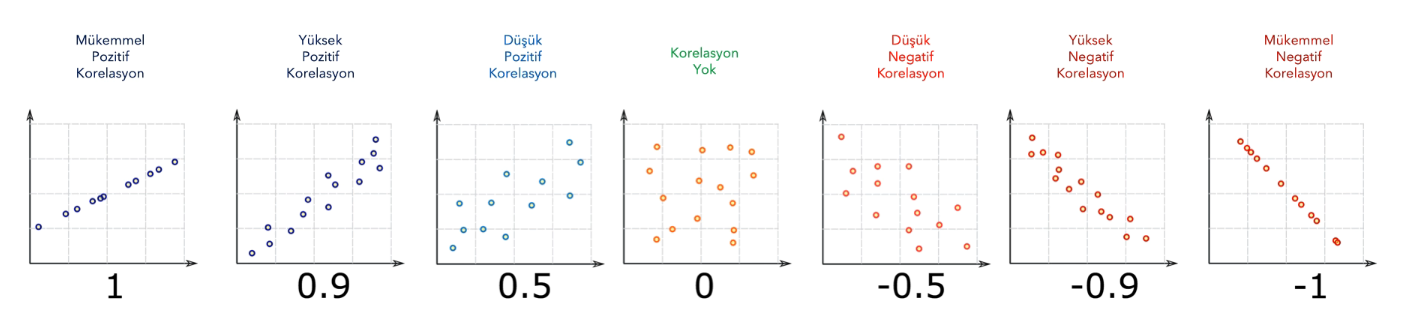

    Pozitif korelasyon: reklam harcamaları arttıkça gelir artar
    Negatif korelasyon: araçların km bilgisi arttıkça fiyatı düşer
    
    
HO: _p_ = 0 (değişkenler arasında korelasyon yoktur)

H1: _p_ != 0 (değişkenler arasında korelasyon vardır yani değişkenler arasında anlamlı bir ilişki vardır)

Beklenti: p-value değerinin 0.05'den küçük olup H0'ı reddetmesi beklenir.


iki değişken için normallik varsayımı:

    varsayım sağlanıyorsa Pearson Korelasyon katsayısı
    varsayım sağlanmıyorsa Spearman Korelasyon katsayısı kullanılır.

#### 5.6.1. Örnek Uygulama

tips veriseti üzerinde bahşiş ile ödenen hesap arasında korelasyon var mı?

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [64]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


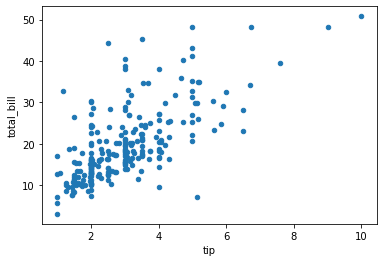

In [65]:
df.plot.scatter("tip","total_bill");

In [66]:
#baslamadan once degiskenlerin birbiriyle olan ilgisinin kaldırılması gerekir.
#total_bill bilgisi odenen hesap ve bahsis toplamini icerdiginden veriyi duzenlememiz gerekiyor.
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


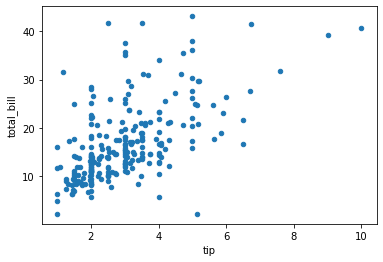

In [67]:
df.plot.scatter("tip","total_bill");

**Varsayım Konrolü**

iki değişken için de normallik varsayımı sağlanıyor mu?

In [68]:
from scipy.stats import shapiro
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


HO: _p_ = 0 (değişkenler arasında korelasyon yoktur)

H1: _p_ != 0 (değişkenler arasında korelasyon vardır yani değişkenler arasında anlamlı bir ilişki vardır)

p-value değerinin 0.05'den küçük olduğundan H0'ı reddetmiş oluyoruz.


**Korelasyon katsayısı**


In [71]:
df["tip"].corr(df["total_bill"]) #defaultta pearson metodunu kullanır. varsayım sağlanmadığından spearman kullanmamız gerekir

0.5766634471096381

In [70]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

0.593 değerinden çıkartıyoruz ki;
    
    (+) değer olduğundan pozitif yönlü
    0.5'e yakın olduğundan da düşük bir korelasyon olduğunu çıkartabiliriz.
    
peki bu ilişki anlamlı mı?

In [73]:
#H0'ı reddetmis olmasaydık
from scipy.stats.stats import pearsonr
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


In [74]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [75]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [77]:
#spearman'a alternatif olarak (işi garantiye almak için de diyebiliriz) kendalltau testi de ek olarak kullanılabilir.
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
